In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\abdel\Downloads\sales_data.csv")


In [3]:
# 1. Display first 5 rows
print(df.head())

# 2. Dataset info
print(df.info())

# 3. Total number of sales records
print("Total records:", len(df))

# 4. Unique regions and customer types
print("Regions:", df['Region'].unique())
print("Customer Types:", df['CustomerType'].unique())

# 5. Min, Max, Average of Total
print("Min:", df['Total'].min())
print("Max:", df['Total'].max())
print("Average:", df['Total'].mean())

   OrderID        Date Region Salesperson   Product  Units  UnitPrice  Total  \
0     1001  2024-09-07  North       Salma   Headset      8         60    480   
1     1002  2024-08-23   East      Mariam  Keyboard      7         40    280   
2     1003  2024-05-04  North     Youssef   Monitor      8        150   1200   
3     1004  2024-12-08  North        Nada   Headset      2         60    120   
4     1005  2024-09-12  South        Nada     Mouse      5         25    125   

  CustomerType  
0    Corporate  
1    Corporate  
2     Consumer  
3     Consumer  
4    Corporate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       100 non-null    int64 
 1   Date          100 non-null    object
 2   Region        100 non-null    object
 3   Salesperson   100 non-null    object
 4   Product       100 non-null    object
 5   Units         1

In [4]:
# 6. Sales made by Ahmed
print(df[df['Salesperson'] == 'Ahmed'])

# 7. Sales where Units > 5
print(df[df['Units'] > 5])

# 8. Sort by Total descending
sorted_df = df.sort_values('Total', ascending=False)
print(sorted_df.head())

# 9. Sales in January 2024
df['Date'] = pd.to_datetime(df['Date'])
jan_sales = df[df['Date'].dt.month == 1]
jan_sales_2024 = jan_sales[df['Date'].dt.year == 2024]
print(jan_sales_2024)

# 10. Corporate customers with Total > 1000
print(df[(df['CustomerType'] == 'Corporate') & (df['Total'] > 1000)])

    OrderID        Date Region Salesperson   Product  Units  UnitPrice  Total  \
9      1010  2024-06-03  South       Ahmed   Monitor      2        150    300   
20     1021  2024-04-16   East       Ahmed   Monitor      8        150   1200   
30     1031  2024-04-04  South       Ahmed   Monitor      4        150    600   
39     1040  2024-10-26   East       Ahmed  Keyboard     10         40    400   
41     1042  2024-02-07   West       Ahmed     Mouse      4         25    100   
43     1044  2024-03-30   East       Ahmed  Keyboard      1         40     40   
49     1050  2024-05-04  North       Ahmed    Laptop      6        850   5100   
59     1060  2024-12-25  South       Ahmed   Monitor      1        150    150   
61     1062  2024-05-28   West       Ahmed  Keyboard      9         40    360   
64     1065  2024-06-12  South       Ahmed   Headset      4         60    240   
69     1070  2024-09-05   West       Ahmed   Monitor      1        150    150   
71     1072  2024-08-24  Sou

C:\Users\abdel\AppData\Local\Temp\ipykernel_16140\1933648496.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jan_sales_2024 = jan_sales[df['Date'].dt.year == 2024]


In [5]:
# 11. Total revenue per region
print(df.groupby('Region')['Total'].sum())

# 12. Average sale amount per salesperson
print(df.groupby('Salesperson')['Total'].mean())

# 13. Orders per customer type
print(df['CustomerType'].value_counts())

# 14. Product with highest total revenue
product_revenue = df.groupby('Product')['Total'].sum()
print("Top product:", product_revenue.idxmax(), "-", product_revenue.max())

# 15. Salesperson who sold most units
units_sold = df.groupby('Salesperson')['Units'].sum()
print("Top salesperson:", units_sold.idxmax(), "-", units_sold.max())

Region
East     16960
North    62255
South    42180
West     24435
Name: Total, dtype: int64
Salesperson
Ahmed      1245.555556
Mariam     2526.176471
Nada       1013.478261
Omar       1542.352941
Salma       829.615385
Youssef    1679.166667
Name: Total, dtype: float64
CustomerType
Consumer     56
Corporate    44
Name: count, dtype: int64
Top product: Laptop - 121550
Top salesperson: Nada - 103


In [6]:
# 16. Add Month column
df['Month'] = df['Date'].dt.month_name()

# 17. Total sales per month
monthly_sales = df.groupby('Month')['Total'].sum()
print(monthly_sales)

# 18. Month with highest revenue
print("Best month:", monthly_sales.idxmax(), "-", monthly_sales.max())

# 19. Average order value per month
avg_order_value = df.groupby('Month')['Total'].mean()
print(avg_order_value)

# 20. Summary of total sales by region and month
summary = df.groupby(['Region', 'Month'])['Total'].sum()
print(summary)

Month
April        11120
August       11350
December     22350
February      5680
January      13955
July          6790
June         27420
March         6750
May          19945
November      2405
October       2780
September    15285
Name: Total, dtype: int64
Best month: June - 27420
Month
April        1390.000000
August        810.714286
December     1490.000000
February      946.666667
January      1993.571429
July          970.000000
June         3427.500000
March        1125.000000
May          2493.125000
November      601.250000
October       463.333333
September    1389.545455
Name: Total, dtype: float64
Region  Month    
East    April         5900
        August         880
        December      8010
        February       120
        July           600
        March          200
        May            850
        October        400
North   April         4250
        August          75
        December      4720
        February      1210
        January      12750
        July

Product
Laptop     121550
Monitor     13800
Headset      4620
Name: Total, dtype: int64
Salesperson
Ahmed      15.374066
Mariam     29.448673
Nada       15.984365
Omar       17.979840
Salma       7.395598
Youssef    13.817459
Name: Total, dtype: float64
   Region   Product  Units
1    East  Keyboard     31
7   North    Laptop     63
12  South    Laptop     42
19   West     Mouse     41


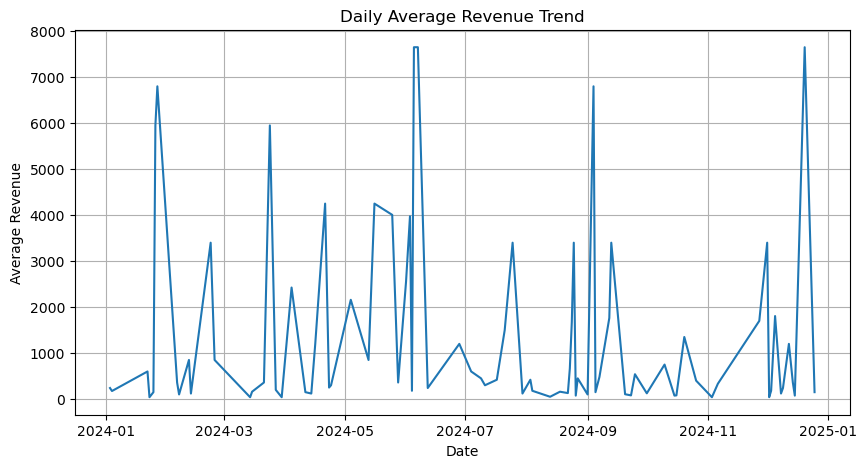

In [7]:
# 21. Top 3 products by revenue
top3_products = df.groupby('Product')['Total'].sum().nlargest(3)
print(top3_products)

# 22. Salesperson revenue contribution %
total_revenue = df['Total'].sum()
contribution = (df.groupby('Salesperson')['Total'].sum() / total_revenue) * 100
print(contribution)

# 23. Add DiscountedTotal column (5% discount)
df['DiscountedTotal'] = df['Total'] * 0.95

# 24. Most sold product per region
most_sold_per_region = df.groupby(['Region', 'Product'])['Units'].sum().reset_index()
print(most_sold_per_region.loc[most_sold_per_region.groupby('Region')['Units'].idxmax()])

# 25. Plot daily average revenue trend
daily_revenue = df.groupby('Date')['Total'].mean()
plt.figure(figsize=(10,5))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Daily Average Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()